# `Практикум по программированию на языке Python`

## `Задание 01. Полносвязная нейронная сеть на numpy`.

#### Фамилия, имя: 

Дата выдачи: <span style="color:red">__13 февраля__</span>.

Мягкий дедлайн: <span style="color:red">__28 февраля 05:00__</span>.

Стоимость: __10 баллов__ (основная часть заданий) + __3 балла__ (дополнительные задания).

<span style="color:red">__В ноутбуке все клетки должны выполняться без ошибок при последовательном их выполнении.__</span>

#### `Москва, 2025`

In [1]:
import numpy as np

## `Теоретическая часть (3 балла)`

В этом блоке вам нужно решить 3 задания.

### `Задание 1. Градиенты для слоя Batch normalization (1.5 балла)`

Рассмотрим слой Batch normalization. Пусть на вход этого слоя был подан батч из $n$ объектов, при этом у всех объектов по 1 признаку. Представим вход BN слоя в виде $X \in \mathbb{R}^{n \times 1}$.

Тогда в этом слое производятся следующие вычисления:

$$ \mu = \frac1n \sum_{i=1}^{n} X_i $$

$$ \sigma^2 = \frac1n \sum_{i=1}^{n} \left(X_i - \mu \right) ^2 $$

$$ \tilde{y_i} = \frac{X_i - \mu}{\sqrt{\sigma^2 + \varepsilon}} $$

$$ y_i = \gamma \tilde{y_i} + \delta $$

Выходом BN слоя является $y_i$, а $\gamma, \delta\in\mathbb{R}$ — параметры, которые подбираются во время обучения вместе с другими параметрами нейронной сети (наряду, например, с весами линейного слоя).

Рассмотрим нейронную сеть, в которой есть BN слой. Предположим, что вычисления в нейронной сети завершаются подсчетом функции потерь $\mathcal{L}$. Пусть мы выполнили прямой проход по нейронной сети и сейчас делаем обратный проход с помощью метода обратного распространения ошибки. Пусть BN слою пришел градиент функции потерь по выходу BN слоя ($\nabla_{y} \mathcal{L}$).

В этом задании вам нужно записать вычисление градиента функции потерь по параметрам слоя BN $\gamma$ и $\delta$ ($\nabla_{\gamma} \mathcal{L}$, $\nabla_{\delta} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$, а также вам нужно записать вычисление градиента функции потерь по входу слоя BN $X$ ($\nabla_{X} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$.

Хочу заметить, в данном задании мы рассматриваем объекты всего с 1 признаком, чтобы упростить выкладки.

__Ваше решение:__

$$ dL = (\nabla_y L)^T dy $$

Запишем дифференциалы всех величин, предварительно приведя их к векторному виду

$$ dy = d\gamma \tilde{y} + \gamma d\tilde{y} + d[\mathbf{1} \delta] = \tilde{y} d\gamma + \gamma d\tilde{y} + \mathbf{1} d\delta$$

Отсюда сразу найдем

$$ \nabla_\gamma L = (\nabla_y L)^T \tilde{y} $$
$$ \nabla_\delta L = (\nabla_y L)^T \mathbf{1} $$

Далее

$$ d\tilde{y} = d \big[ \frac{X - \mu}{\sqrt{\sigma^2 + \varepsilon}} \big] = \frac{dX - d\mu}{\sqrt{\sigma^2 + \varepsilon}} - \frac{1}{2}\frac{d(\sigma^2)(X - \mu)}{(\sigma^2 + \varepsilon)^{3/2}}$$

Тогда осталось найти

$$ d\mu = \frac{1}{n} \mathbf{1}^T dX $$
$$ d(\sigma^2) = \frac{1}{n}d\langle X - \mathbf{1} \mu, X - \mathbf{1} \mu\rangle = \frac{2}{n}\langle X - \mathbf{1} \mu, dX - \mathbf{1} d\mu\rangle = \frac{2}{n}\langle X - \mathbf{1} \mu, dX - \frac{1}{n} \mathbf{1}\mathbf{1}^T dX\rangle$$

Преобразуем последнее выражение

$$ d(\sigma^2) = \frac{2}{n}\langle X - \mathbf{1} \mu, (I - \frac{1}{n} \mathbf{1}\mathbf{1}^T) dX \rangle = \frac{2}{n}(X - \mathbf{1} \mu)^T (I - \frac{1}{n} \mathbf{1}\mathbf{1}^T) dX = \frac{2}{n} \big[ X^T -  \mu\mathbf{1}^T - \frac{1}{n} X^T \mathbf{1}\mathbf{1}^T + \frac{1}{n} \mu\mathbf{1}^T\mathbf{1}\mathbf{1}^T \big]dX =$$
$$= \frac{2}{n} \big[ X^T -  \mu\mathbf{1}^T - \frac{1}{n} X^T \mathbf{1}\mathbf{1}^T + \mu\mathbf{1}^T \big]dX = \frac{2}{n} \big[ X^T - \frac{1}{n} X^T \mathbf{1}\mathbf{1}^T \big]dX = \frac{2}{n} \big[ X^T - \mu\mathbf{1}^T \big]dX$$

Подставляя в исходное выражение

$$ d\tilde{y} = \frac{dX - \mathbf{1} d\mu}{\sqrt{\sigma^2 + \varepsilon}} - \frac{1}{2}\frac{d(\sigma^2) \tilde{y}}{\sigma^2 + \varepsilon} = 
\frac{dX - \frac{1}{n} \mathbf{1} \mathbf{1}^T dX}{\sqrt{\sigma^2 + \varepsilon}} - \frac{1}{2}\frac{2}{n}\frac{\big[ X^T - \mu\mathbf{1}^T \big]dX \tilde{y}}{\sigma^2 + \varepsilon} =$$

$$= \frac{\big(I - \frac{1}{n} \mathbf{1} \mathbf{1}^T \big)dX}{\sqrt{\sigma^2 + \varepsilon}} - \frac{1}{n}\frac{\big[ X^T - \mu\mathbf{1}^T \big]dX \tilde{y}}{\sigma^2 + \varepsilon} = 
\frac{\big(I - \frac{1}{n} \mathbf{1} \mathbf{1}^T \big)dX}{\sqrt{\sigma^2 + \varepsilon}} - \frac{1}{n}\frac{\tilde{y} \big[ X^T - \mu\mathbf{1}^T \big] dX }{\sigma^2 + \varepsilon} =
\frac{\big(I - \frac{1}{n} \mathbf{1} \mathbf{1}^T \big)dX}{\sqrt{\sigma^2 + \varepsilon}} - \frac{1}{n}\frac{\tilde{y} \tilde{y}^TdX }{\sqrt{\sigma^2 + \varepsilon}} =$$
$$ = \frac{1}{\sqrt{\sigma^2 + \varepsilon}}\big[I - \frac{1}{n} \mathbf{1} \mathbf{1}^T - \frac{1}{n}\tilde{y} \tilde{y}^T\big]dX$$

И наконец

$$dL = ... + (\nabla_y L)^T \gamma d\tilde{y} = ... + (\nabla_y L)^T \gamma \frac{1}{\sqrt{\sigma^2 + \varepsilon}}\big[I - \frac{1}{n} \mathbf{1} \mathbf{1}^T - \frac{1}{n}\tilde{y} \tilde{y}^T\big]dX = \frac{\gamma}{\sqrt{\sigma^2 + \varepsilon}}\big[(\nabla_y L)^T - \frac{1}{n} (\nabla_y L)^T\mathbf{1} \mathbf{1}^T - \frac{1}{n} (\nabla_y L)^T\tilde{y} \tilde{y}^T\big]dX$$

Тогда по определению

$$\nabla_X L = \frac{\gamma}{\sqrt{\sigma^2 + \varepsilon}}\big[\nabla_y L - \frac{1}{n} \mathbf{1} \mathbf{1}^T \nabla_y L - \frac{1}{n} \tilde{y} \tilde{y}^T\nabla_y L\big]$$

### `Задание 2. Вывод инициализации весов линейного слоя при использовании ReLU в качестве функции активации (1 балл)`

Рассмотрим полносвязную нейронную сеть с функцией активации $g(y)$. Пусть сеть состоит из $L$ слоев и размер входа слоя $l$ равен $n_l\ \ (l = \overline{1, L})$.

Обозначим за $x^l \in \mathbb{R}^{n_{l}}$ вход слоя $l$, за $y^l \in \mathbb{R}^{n_{l+1}}$ — выход слоя $l$, за $W^l \in \mathbb{R}^{n_{l+1} \times n_{l}}$ — веса слоя $l$, за $b^l \in \mathbb{R}^{n_{l+1}}$ — вектор сдвига слоя $l$.

Тогда
$$y^l = W^l x^l + b^l,$$
$$x^{l+1} = g(y^l).$$

На паре вы выводили хорошую инициализацию для линейного слоя в случае, когда в качестве функции активации $g(y)$ в нейронной сети используется гиперболический тангенс $g(y) = \tanh(y)$. Сейчас вам нужно сделать подобный вывод для случая, когда в сети в качестве функций активации используется $g(y) = ReLU(y) = \max(0, y)$.

Сделаем следующие предположения насчет того, как распределены веса $W^l$, вектор сдвига $b^l$, входной вектор $x^l$, выходной вектор $y^l$ линейного слоя и градиенты функции потерь $\frac{\partial L}{\partial y^{l}}$ $(l = \overline{1, L}$):

1. Все компоненты в $W^l$ распределены одинаково и независимо друг от друга;
2. Все компоненты в $y^l$ распределены одинаково и независимо друг от друга;
3. Все компоненты в $x^l$ распределены одинаково и независимо друг от друга;
4. Все компоненты в $\frac{\partial L}{\partial y^{l}}$ распределены одинаково и независимо друг от друга;
5. Все компоненты в $W^l$ и все компоненты в $x^l$ независимы друг от друга;
6. Все компоненты в $W^l$ имеют четную плотность распределения (то есть симметричную относительно нуля: $p_{W^l}(-x) = p_{W^l}(x)$);
7. Все компоненты в $W^l$ имеют конечное матожидание;
8. Вектор $b^l$ инициализирован нулями.


Подсказки:
1. Из пунктов 6 и 7 следует, что все компоненты в $W^l$ имеют нулевое среднее ($\mathbb{E} W^l_{ij} = 0\ \ \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}$) (докажите);
2. Из пунктов 6 и 7 следует, что все компоненты в $y^l$ имеют нулевое среднее и четную плотность распределения (докажите).

__Ваше решение:__

Начнем с подсказок. Подсказка 1:

$ \mathbb{E} W^l_{ij} = \int_{-\infty}^{\infty}xp_{W^l_{ij}}(x)dx $ - По предположению 7. такой интеграл сходится абсолютно, по предположению 6. ф-ия $x p_{W^l_{ij}}(x)$ - нечетная, отсюда $\mathbb{E} W^l_{ij} = 0$

Подсказка 2:

$ y^l = W^lx^l + b^l$

$$\mathbf{E}y^l = \mathbf{E}[W^lx^l + b^l] = \mathbf{E}[W^lx^l] + \mathbf{E}[b^l]$$

из пункта 8 получим

$$\mathbf{E}y^l = \mathbf{E}[W^lx^l] = \text{\{Из независимости распределений\}} = \mathbf{E}W^l \mathbf{E}x^l = 0$$

Пусть $\xi = W^l_{ij}x^l_j, \eta = W^l_{i1}x^l_1 + W^l_{i2}x^l_2$ (То есть $\xi$ это слуайная величина равная произведению сл. величин W и x - помним что они i.i.d)

По формуле свертки $p_{\xi}(y) = \int_{\infty}^{\infty} p_{w}(\frac{y}{x})p_{x}(x)dx$, тогда 

$$p_{\xi}(-y) = \int_{\infty}^{\infty} p_{W}(\frac{-y}{x})p_{x}(x)dx = \text{\{Четность плотности W\}} = \int_{\infty}^{\infty} p_{W}(\frac{y}{x})p_{x}(x)dx = p_{\xi}(y)$$

Получили четность $p_{\xi}(x)$. По формуле свертки $p_{\eta}(y) = \int_{\infty}^{\infty} p_{\xi}(y - x)p_{\xi}(x)dx$

$$p_{\eta}(-y) = \int_{-\infty}^{\infty} p_{\xi}(-y - x)p_{\xi}(x)dx = \int_{-\infty}^{\infty} p_{\xi}(y + x)p_{\xi}(x)dx = \{ t = -x \} = -\int_{\infty}^{-\infty} p_{\xi}(y - t)p_{\xi}(-t)dt = \int_{-\infty}^{\infty} p_{\xi}(y - t)p_{\xi}(t)dt = p_{\eta}(y)$$

Далее чтобы показать что $\eta_{n^l} = \sum\limits_{j=1}^{n^l} \xi_j$ имеет четную плотность, где $\xi_j = W^l_{ij}x^l_j$ будем по индукции рассматривать $\eta_{j + 1} = \xi_j + \eta_j$, $\eta_0 = 0$, таким образом на $k$-ом шаке индукции имеем четные $\eta_{k-1}$ и $\xi_{k-1}$ откуда по формуле свертки, аналогично проделанным выше преобразованиям получаем четность плотности $\eta_k$. Отсюда следует, что $y_i^l \sim \eta_{n^l}$ имеет четную плотность распределения.


Далее запишем дисперсию выхода с $l$-го линейного слоя при прямом проходе

$$Var(y^l_i) = Var(W^l_ix^l) = \sum_{k=1}^{n} Var(W^l_{ik}x^l_k) = \sum_{k=1}^{n} \mathbf{E}[x^l_k]^2 Var(W^l_{ik}) + \mathbf{E}[W^l_{ik}]^2 Var(x^l_k) + Var(x^l_k) Var(W^l_{ik}) = \sum_{k=1}^{n} \big(\mathbf{E}[x^l_k]^2 + Var(x^l_k) \big) Var(W^l_{ik})$$

Последний переход следует из доказанного факта о нулевом среднем компонент $W^l$. Учитывая $Var(x^l_k) = \mathbf{E}\big[(x^l_k)^2\big] - \mathbf{E}[x^l_k]^2$ и то что компоненты $x$ и $W$ являются i.i.d. получим

$$ Var(y^l_i) = n\mathbf{E}\big[(x^l_k)^2\big] Var(W^l_{ik}) $$

Где $n = n^l$

Вспоминаем, что $x^l_k = ReLU(y^{l-1}_k)$ 

$$ \mathbf{E} \big[(x^l_k)^2 \big] = \mathbf{E} \big[ReLU(y^{l-1}_k)^2 \big] = \int_{-\infty}^{+\infty} ReLU(x)^2 p_{y^{l-1}_k}(x) d(x) = \int_{0}^{+\infty} x^2 p_{y^{l-1}_k}(x) d(x)$$

Учитывая четность $p_{y^{l-1}_k}$ и $x^2$

$$ \mathbf{E} \big[(x^l_k)^2 \big] = \frac{1}{2} \int_{-\infty}^{+\infty} x^2 p_{y^{l-1}_k}(x) d(x) = \frac{1}{2} Var(y^{l-1}_k)$$

Получим

$$ Var(y^l_i) = n^l \frac{1}{2} Var(y^{l-1}_k) Var(W^l_{ik}) $$

Или, учитывая i.i.d.

$$ Var(y^l_0) = \frac{n^l}{2} Var(y^{l-1}_0) Var(W^l_{00}) $$

Тогда, чтобы не менять дисперсию выберем $W^l_{ij}: Var(W^l_{ij}) = 2 / n^l$

Получили инициализацию для всех весов, кроме первого слоя (Для него, в силу отсутствия ReLU, инициализация подойдет с $W^l_{ij}: Var(W^l_{ij}) = 1 / n^l$). Далее рассмотрим обратный проход

$$ dL = \nabla_{y^l} L^T dy^l = \nabla_{y^l} L^T W dx^l + ...$$

$$ \nabla_{x^l} L = W^T \nabla_{y^l} L$$

$$ dL = \nabla_{x^{l + 1}} L^T dx^{l + 1} = \nabla_{x^{l + 1}} L^T g'(y^l) dy^l$$

$$ \nabla_{y^{l}} = \nabla_{x^{l + 1}} L \odot g'(y^l) $$

$$ \mathbf{E}[\nabla_{y^l}L] = \mathbf{E}[\nabla_{x^{l + 1}} L \odot g'(y^l)]$$

Немного подробнее про функцию $f = \nabla_{x^{l + 1}} L \odot g'(y^l)$

$$ f_k = \cases{\nabla_{x^{l + 1}} L, y^l > 0\\ 0, y^l <= 0} $$

Что то же самое что (Из принципа действия ReLU)

$$ f_k = \cases{\nabla_{x^{l + 1}} L, x^{l + 1} > 0\\ 0, x^{l + 1} <= 0} $$

Тогда

$$ \mathbf{E}[\nabla_{y^l}L] = \int_{0}^{+\infty} x p_{\nabla_{x^{l + 1}} L}(x) d(x) = \frac{1}{2}\mathbf{E}[\nabla_{x^{l+1}}L] = 0$$


$$ \int_{-\infty}^{+\infty} xg'(x) p_{\partial L / \partial x^{l+1}_k}(x) d(x) $$

$$ Var(\nabla_{x^l} L_i) = \sum_{k=1}^{n^{l+1}} Var(W^l_{ik})Var(y^l_k) = n^{l + 1} Var(W^l_{ik})Var(\nabla_{y^l} L_k)$$

$$ Var(\frac{\partial L}{\partial y^l_k}) = Var(g'(y^l_k) \frac{\partial L}{\partial x^{l+1}_k})$$

$$ Var \big (\frac{\partial L}{\partial y^l_k} \big) = \text{\{Нулевое матожидание\}} = \mathbf{E}\big[\frac{\partial L}{\partial y^l_k}^2\big] = \text{\{Аналогично тому что выше\}} =\int_{0}^{+\infty} x^2 p_{\partial L / \partial x^{l+1}_k}(x) d(x) = \frac{1}{2} Var(\frac{\partial L}{\partial x^{l+1}_k}) $$

Отсюда получим что хорошая инициализация $W^l_{ij}: Var(W^l_{ij}) = 2 / n^{l+1}$

Несмотря на то что две выведенные инициализации отличаются, в оригинальной статье сказано, что использование каждой из них приводит к повышению эффективности обучения.

### `Задание 3. Почему функция активации` $ReLU(y) = \max(0, y)$ `предпочтительней сигмоиды` $\sigma(y) = \frac{1}{1 + \exp(-y)}$ `в нейронных сетях? (0.5 балла)`

Дайте развернутый ответ на вопрос "Почему функция активации $ReLU(y) = \max(0, y)$ предпочтительней сигмоиды $\sigma(y) = \frac{1}{1 + \exp(-y)}$ в нейронных сетях?"

__Ваш ответ:__

Функция активация сигмоиды такова, что $\sigma: R \rightarrow (0, 1)$. Кроме того $\sigma'(y) = \sigma(y) (1 - \sigma(y))$, тоже находится в отрезке (интервале) от 0 до 1.

Вспоминая, как будут трансформироваться градиенты при проходе назад через слой сигмоиды, получим: $ \nabla_{y_{i}}L \leftarrow \sigma \leftarrow \nabla_{y_{i+1}}L$, где $\nabla_{y_{i}}L = \sigma'(y) \odot \nabla_{y_{i+1}}L$. Таким образом при каждом обратном проходе через слой сигмоиды градиенты умножаются на число от 0 до 1, что может привести к затуханию градиентов (за счет многократного умножения на производную сигмоиды в многослойных моделях градиенты близких к входному слоев нейронной сети будут значительно меньше тех, что близки к выходному слою).

В случае $ReLU$ - производная $ReLU'(y) = \cases{
1, y > 0\\
0\text{, иначе} 
}$ - никакого влияния на увеличение / уменьшение модулей градиентов (кроме обращения в 0) не оказывается. Таким образом мы предотвращаем и `затухание` и `взрыв` градиентов. Кроме того из плюсов можно отметить более дешевое вычисление ReLU и градиентов (т. к. не требуется вычисление экспоненты) и наличие простой интерпретации (нейрон активируется / не активируется с определенным порогом), имеющей "биологическое" обоснование (схожим образом устроены нейроны в мозге).

---

## `Практическая часть (7 баллов)`

### `Реализация нейронной сети (3 балла)`

В этом задании вы обучите полносвязную нейронную сеть распознавать рукописные цифры (а что же еще, если не их :), [почти] самостоятельно реализовав все составляющие алгоритма обучения и предсказания.

Для начала нам понадобится реализовать прямой и обратный проход через слои. Наши слои будут соответствовать следующему интерфейсу (на примере "тождественного" слоя):

In [2]:
class IdentityLayer:
    """
    A building block. Each layer is capable of performing two things:

    - Process input to get output:           
    output = layer.forward(input)

    - Propagate gradients through itself:    
    grad_input = layer.backward(input, grad_output)

    Some layers also have learnable parameters.

    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """
        Here you can initialize layer parameters (if any) 
        and auxiliary stuff. You should enumerate all parameters
        in self.params
        """
        # An identity layer does nothing
        self.params = []
        pass

    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], 
        returns output data [batch, output_units]
        """
        # An identity layer just returns whatever it gets as input.
        self.input = input
        return input

    def backward(self, grad_output): 
        """
        Performs a backpropagation step through the layer, 
        with respect to the given input.

        To compute loss gradients w.r.t input, 
        you need to apply chain rule (backprop):

        d `loss` / d `input` = (d `loss` / d `layer`) * (d `layer` / d `input`)

        Luckily, you already receive d `loss` / d `layer` in argument, 
        so you only need to multiply it by d `layer` / d `input`.

        NB: Sometimes d `layer` / d `input` can be a 3D or even 4D tensor.
        So it's better to write down the `loss` differential and extract
        d `layer` / d `input` from it so that only 2D tensors were present.

        The method returns:
        * gradient w.r.t input (will be passed to 
          previous layer's backward method)
        * flattened gradient w.r.t. parameters (with .ravel() 
          applied to each gradient). 
          If there are no params, return []
        """
        # The gradient of an identity layer is precisely grad_output
        input_dim = self.input.shape[1]

        d_layer_d_input = np.eye(input_dim)

        return np.dot(grad_output, d_layer_d_input), [] # chain rule

#### `Слой нелинейности ReLU`

Для начала реализуем слой нелинейности $ReLU(y) = \max(0, y)$. Параметров у слоя нет. Метод `forward` должен вернуть результат поэлементного применения $ReLU$ к входному массиву, метод `backward` — градиент функции потерь по входу слоя. В нуле будем считать производную равной 0. Обратите внимание, что при обратном проходе могут понадобиться величины, посчитанные во время прямого прохода, поэтому их стоит сохранить как атрибут класса.

In [3]:
class ReLU:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        self.params = [] # ReLU has no parameters
        self.forward_res = None

    def forward(self, input):
        """Apply elementwise ReLU to [batch, num_units] matrix"""
        self.tmp = input
        return np.maximum(0, input)
        
    def backward(self, grad_output):
        """Compute gradient of loss w.r.t. ReLU input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        if self.tmp is None:
            raise Exception('Do forward before')
        return grad_output * np.where(self.tmp > 0, 1, 0), []
    
    def __repr__(self):
        return 'Relu()'

#### `Полносвязный слой`

Далее реализуем полносвязный слой без нелинейности. У слоя два параметра: матрица весов и вектор сдвига.

Обратите внимание на второй аргумент: в нем надо возвращать градиент по всем параметрам в одномерном виде. Для этого надо сначала применить `.ravel()` ко всем градиентам, а затем воспользоваться `np.r_`:

In [4]:
# example
np.r_[np.eye(3).ravel(), np.arange(4)]

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2., 3.])

In [5]:
class Dense:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self, input_units, output_units):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = x W + b
        """
        # initialize weights with small random numbers from normal distribution
        self.weights = np.random.randn(input_units, output_units) * 0.01
        self.biases = np.zeros(output_units)
        self.params = [self.weights, self.biases]

    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = x W + b
        
        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        self.tmp = input
        return input @ self.weights + self.biases

    def backward(self, grad_output):
        """
        compute gradients
        grad_output shape: [batch, output_units]
        output shapes: [batch, input_units], [num_params]
        
        hint: use function np.r_
        np.r_[np.arange(3), np.arange(3)] = [0, 1, 2, 0, 1, 2]
        """
        return grad_output @ self.weights.T, np.r_[
            (self.tmp.T @ grad_output).ravel(),
            grad_output.sum(axis=0)
        ]
        
    
    def __repr__(self):
        return f'Dense({self.weights.shape[0]}, {self.weights.shape[1]})'

#### `Проверка градиента`

Проверим правильность реализации с помощью функции численной проверки градиента. Функция `eval_numerical_gradient` принимает на вход callable объект `f` (функцию от одного аргумента-матрицы) и аргумент `x` и вычисляет приближенный градиент функции `f` в точке `x`.

In [6]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
    """
    Evaluates gradient df/dx via finite differences:
    df/dx ~ (f(x+h) - f(x-h)) / 2h
    Adopted from https://github.com/ddtm/dl-course/
    """
    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope
        if verbose:
            print (ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

Вычислите аналитический и численный градиенты по входу слоя ReLU от функции
$$ f(y) = \sum_i y_i, \quad y = ReLU(x) $$

Выпишите аналитический градиент в этой ячейке:

$$df = (\nabla_y f)^T dy $$
Где $f(y) = \mathbf{1}^T y$, а $\mathbf{1} = (1, ..., 1)$, тогда $df = \mathbf{1}^Tdy$

$dy = (\nabla_x ReLU)^T dx$, тогда $df = (\nabla_y g)^T (\nabla_x ReLU)^T dx = \big([\nabla_x ReLU]\mathbf{1}\big)^T dx$

Посчитаем $\nabla_x ReLU$ - якобиан

$$\frac{D(y)}{D(x)} = diag(h(x_i)), \text{ где } h(x_i) = \cases{1, x_i > 0\\ 0, x_i <= 0}$$

Подставив в выражение для $df$ получим

$$df = (h(x))^T dx \Rightarrow \nabla_x f = h(x)$$

Также заметим что $df = ([\nabla_x ReLU]\nabla_y f)^T dx$, то есть $\nabla_x f  = [\nabla_x ReLU]\nabla_y f = h(x) \odot \nabla_y f$ (последняя форма записи и используется в вычислениях)

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [7]:
relu = ReLU()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

### your code here
relu.forward(points)
grads = relu.backward(np.ones([10, 12]))[0]

def f(x):
    x = relu.forward(x)
    return np.sum(x)
    
numeric_grads = eval_numerical_gradient(f, points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

Вычислите аналитический и численный градиенты по входу полносвязного слоя от функции
$$ f(y) = \sum_i y_i, \quad y = W x + b $$

Выпишите аналитический градиент в этой ячейке (советуем выписать градиент через дифференциал функции $f$):

$$df = (\nabla_y f)^T dy = \mathbf{1}^T [W dx + dW x + db]$$

Тогда ($\mathbf{1}^T W dx = tr(\mathbf{1}^T dW x) = tr([x \mathbf{1}^T] dW) = \langle \mathbf{1}x^T, dW\rangle$)

$$\nabla_x f = W^T \mathbf{1}$$
$$\nabla_W f = \mathbf{1}x^T$$
$$\nabla_b f = \mathbf{1}$$

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [8]:
linear = Dense(12, 32)
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

### your code here
linear.forward(points)
grads = linear.backward(np.ones([10, 32]))[0]

def f(x):
    x = linear.forward(x)
    return np.sum(x)

numeric_grads = eval_numerical_gradient(f, points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

#### `Реализация softmax-слоя и функции потерь`

Для решения задачи многоклассовой классификации обычно используют $softmax$ в качестве нелинейности на последнем слое, чтобы получить вероятности классов для каждого объекта:
$$\hat y = softmax(x)  = \left \{\frac {\exp(x^i)}{\sum_{j=1}^K \exp(x^j)} \right \}_{i=1}^K, \quad K - \text{число классов.}$$

Здесь за $x^i$ мы обозначаем $i$-ый признак объекта $x$.

В качестве функции потерь выберем отрицательный логарифм правдоподобия (по английски: negative log likelihood или NLL)
$$L(y, \hat y) = -\sum_{i=1}^K y^i \log \hat y^i,$$
где $y^i = 1$, если объект принадлежит $i$-му классу, и $y^i = 0$ иначе.

NLL совпадает с выражением для [кросс-энтропии](https://ru.wikipedia.org/wiki/Перекрёстная_энтропия) (в качестве первого распределения берем вырожденное распределение $y$, в качестве второго — предсказанное распределение $\hat y$). Очевидно, что эту функцию потерь также можно переписать через индексацию, если через $y$ обозначить класс данного объекта:
$$L(y, \hat y) = - \log \hat y_{y}$$

В таком виде ее удобно реализовывать.

Для обучения нейронной сети будем оптимизировать эту функцию потерь по параметрам нейронной сети:

$$ \frac1N \sum_{i=1}^N L(y_i, \hat y_i) = \frac1N \sum_{i=1}^N L(y_i, \text{NN}(x_i)) \rightarrow \min_{w}\,,$$
где за $x_i$ и $y_i$ мы обозначили признаки и таргет $i$-ого объекта обучающей выборки, за $\text{NN}$ мы обозначили нейронную сеть, которая по признакам объекта $x_i$ выдает распределение вероятностей $\hat y_i$, за $w$ мы обозначили все веса нейронной сети, а $N$ — это число объектов в обучающей выборке.

Реализуйте слой `LogSoftmax` (у этого слоя нет параметров). Метод `forward` должен вычислять логарифм от $softmax$, а метод `backward` — пропускать градиенты. В общем случае в промежуточных вычислениях `backward` получится трехмерный тензор, однако для нашей конкретной функции потерь все вычисления можно реализовать в матричном виде.  Поэтому мы будем предполагать, что аргумент `grad_output` — это матрица, у которой в каждой строке только одно ненулевое значение (не обязательно единица).

**Пожелание.** Постарайтесь максимально упростить формулу градиентов, чтобы получился лаконичный и стабильный код. Большие и страшные реализации часто оказываются нестабильными.

In [9]:
from scipy.special import logsumexp
# use this function instead of np.log(np.sum(np.exp(...))) because it is more stable

In [10]:
class LogSoftmax:
    def __init__(self):
        self.params = []

    def forward(self, input):
        """
        Applies softmax to each row and then applies component-wise log
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        ### your code here
        self.tmp = input - logsumexp(input, axis=1, keepdims=True)
        return self.tmp
        
    def backward(self, grad_output):
        """
        Propagartes gradients.
        Assumes that each row of grad_output contains only 1 
        non-zero element
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        Do not forget to return [] as second value (grad w.r.t. params)
        """
        ### your code here
        return grad_output - np.exp(self.tmp) * grad_output.sum(axis=1, keepdims=True), []
    
    def __repr__(self):
        return 'LogSoftmax()'

Реализуйте функцию потерь и градиенты функции потерь. Во время вычисления NLL усредняйте (а не суммируйте) значения функции потерь по батчу. Обычно так делают для того, чтобы при двух запусках обучения нейронной сети с разными размерами батча получаемые значения функции потерь у этих сетей были сравнимы.

In [11]:
def NLL(activations, target):
    """
    Returns negative log-likelihood of target under model represented by
    activations (log probabilities of classes, it's just output of LogSoftmax layer).
    `activations` has shape [batch, num_classes], `target` has shape [batch]
    Output shape: 1 (scalar).
    """
    ### your code here
    log_probs = activations[np.arange(len(target)), target]
    nll = -np.mean(log_probs)
    return nll


def grad_NLL(activations, target):
    """
    Returns gradient of negative log-likelihood w.r.t. activations.
    each arg has shape [batch, num_classes]
    output shape: [batch, num-classes]
    """
    grad = np.zeros_like(activations)
    grad[np.arange(len(target)), target] -= 1
    return grad / target.shape[0]

Наконец, выполните проверку `LogSoftmax`-слоя, используя функцию потерь и ее градиент:

In [12]:
n = 50
d = 10
lsm = LogSoftmax()
target = np.random.choice(d, size=n)
points = np.random.uniform(-1, 1, n*d).reshape([n, d])

### your code here
log_probs = lsm.forward(points)
grads = lsm.backward(grad_NLL(log_probs, target))[0]

def f(x):
    x = lsm.forward(x)
    return NLL(x, target)

numeric_grads = eval_numerical_gradient(f, points, verbose=False)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

### `Загрузка данных`

Мы реализаовали все архитектурные составляющие нашей нейронной сети. Осталось загрузить данные и обучить модель. Мы будем работать с датасетом `digits`, каждый объект в котором — это 8x8 изображение рукописной цифры.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [14]:
from sklearn.datasets import load_digits

In [15]:
X, y = load_digits(return_X_y=True)

In [16]:
X.shape, y.shape

((1797, 64), (1797,))

Разделим данные на обучение и контроль:

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

### `Сборка и обучение нейронной сети (0.8 балла)`

В нашей реализации мы представляем нейронную сеть в виде списка ее слоев. Например, следующая функция конструирует нейронную сеть заданной ширины (то есть с заданным размером скрытых слоев) и глубины (то есть с заданным количеством слоев) с заданным размером входа и выхода, а также с заданной функцией активации между линейными слоями.

In [20]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [21]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

Реализуйте функцию, которая выполнет прямой проход по нейронной сети:

In [22]:
def forward(network, X):
    """
    Perform forward pass through the network.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: 
    output shape: [batch, out_features_num]
    """
    ### your code here
    for layer in network:
        X = layer.forward(X)
    return X

Для проверки, хорошо ли сеть обучилась, нам понадобится вычислять долю правильных ответов (accuracy) на данной выборке. Для этого реализуйте функцию, которая делает предсказания на каждом объекте (логично в качестве предсказания на очередном объекте выдавать тот класс, для которого предсказанный логарифм вероятности максимален):

In [23]:
def predict(network, X):
    """
    Returns predictions for each object in X.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    pred_probs = forward(network, X)
    return np.argmax(pred_probs, axis=1)

Мы будем обучать параметры нейросети с помощью готовой функции оптимизации из модуля `scipy`:

In [24]:
from scipy.optimize import minimize

In [25]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.

    Parameters
    ----------
    fun : callable
        The objective function to be minimized::

            fun(x, *args) -> float

        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.

        Suppose the callable has signature ``f0(x, *my_args, **my_kwargs)``, where
        ``my_args`` and ``my_kwargs`` are required positional and keyword arguments.
        Rather than passing ``f0`` as the callable, wrap it to accept
        only ``x``; e.g., pass ``fun=lambda x: f0(x, *my_args, **my_kwargs)`` as the
        callable, where ``my_args`` (tuple) and ``my_kwargs`` (dict) have been
        gathered before invoking this

Эта функция имеет стандартный интерфейс: нужно передать callable объект, который вычисляет значение и градиент целевой функции, а также точку старта оптимизации — начальное приближение (одномерный `numpy`-массив). Поэтому нам понадобятся функции для сбора и задания всех весов нашей нейросети (именно для них мы всегда записывали параметры слоя в список `layer.params`)

In [26]:
def get_weights(network):
    weights = []
    for layer in network:
        for param in layer.params:
            weights += param.ravel().tolist()
    return np.array(weights)


def set_weights(weights, network):
    i = 0
    for layer in network:
        for param in layer.params:
            l = param.size
            param[:] = weights[i:i+l].reshape(param.shape)
            i += l

Вам нужно реализовать ту самую функцию, которую мы будем передавать в `minimize`. Эта функция должна брать на вход текущую точку (вектор всех параметров), а также список дополнительных параметров (мы будем передавать через них нашу сеть и обучающие данные) и возвращать значение критерия качества (NLL) и его градиент по параметрам модели.

In [27]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]
    
    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)
    
    Do not forget to set weights of the network!
    """
    network, X, y = args
    set_weights(weights, network)
    probs = forward(network, X)

    loss = NLL(probs, y)
    grad = grad_NLL(probs, y)

    w_grad = list()
    for layer in reversed(network):
        grad, layer_grad = layer.backward(grad)
        w_grad = list(layer_grad) + w_grad
    return loss, np.array(w_grad)

Теперь мы готовы обучать нашу нейросеть. 

In [28]:
weights = get_weights(network)

In [29]:
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method="L-BFGS-B",                # optimization method
    jac=True,                         # says that gradient is computed in fun
)

In [30]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [31]:
res["nit"] # number of iterations (should be >> 10)

119

In [32]:
res["success"] # should be True

True

In [33]:
res["x"] # leraned weights

array([-0.00674604, -0.01063865,  0.00172476, ..., -0.4744573 ,
       -1.170138  , -0.20679316], shape=(3466,))

Выведите качество на обучении (`X_train`, `y_train`) и на контроле (`X_test`, `y_test`). Не забудьте установить веса!

In [34]:
### your code here
set_weights(res['x'], network)

print(
    'NLL (Train / Test) \t:',
    compute_loss_grad(res['x'], args=[network, X_train, y_train])[0], ' / ',
    compute_loss_grad(res['x'], args=[network, X_test, y_test])[0],
)
print('Accuracy (Train / Test)\t:',
      np.sum(predict(network, X_train) == y_train) / y_train.shape[0], ' / ',
      np.sum(predict(network, X_test) == y_test) / y_test.shape[0])

NLL (Train / Test) 	: 1.0734840501802854e-06  /  0.4323515442326223
Accuracy (Train / Test)	: 1.0  /  0.9644444444444444


У `minimize` есть также аргумент `callback` — в нее можно передать функцию, которая будет вызываться после каждой итерации оптимизации. Такую функцию удобно оформить в виде метода класса, который будет сохранять качество на обучении контроле после каждой итерации. Реализуйте этот метод в классе `Callback`:

In [35]:
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []
        
    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        set_weights(weights, network)
        self.train_acc.append(
            np.mean(predict(network, X_train) == y_train)
        )
        self.test_acc.append(
            np.mean(predict(network, X_test) == y_test)
        )
        if self.print:
            print(self.train_acc[-1], self.test_acc[-1])

In [36]:
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

res = minimize(
    compute_loss_grad, weights,  
    args=[network, X_train, y_train], 
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)

Изобразите на графике кривую качества на обучени и контроле по итерациям:

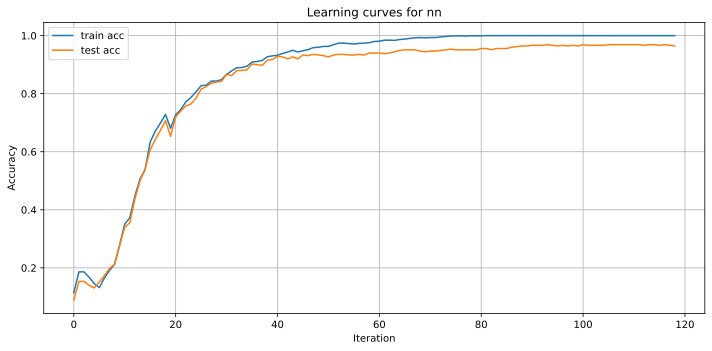

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_title('Learning curves for nn')

ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

### `Эксперименты с числом слоев (0.6 балла)`

Ясно, что из-за случайного начального приближения с каждым запуском обучения мы будем получать различное качество. Попробуем обучить нашу нейросеть с разным числом слоев несколько раз.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети с $i+1$ полносвязными слоями при $j$-м запуске (все запуски идентичны).

In [89]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [90]:
### your code here
from tqdm import tqdm
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

for layers in tqdm(range(5)):
    for launch in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, layers + 1, ReLU)
        weights = get_weights(network)
        res = minimize(
            compute_loss_grad, weights,       # fun and start point
            args=[network, X_train, y_train], # args passed to fun
            method="L-BFGS-B",                # optimization method
            jac=True,                         # says that gradient is computed in fun
        )
        set_weights(res['x'], network)
        accs_train[layers, launch] = np.mean(predict(network, X_train) == y_train)
        accs_test[layers, launch] = np.mean(predict(network, X_test) == y_test)
        

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.03it/s]


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

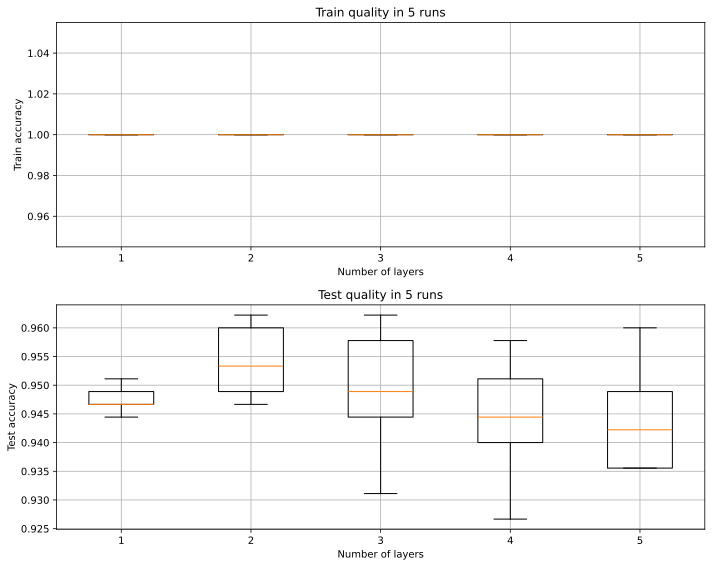

In [91]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Number of layers")
axes[1].set_xlabel("Number of layers")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как изменяются качество на обучении и контроле и устойчивость процесса обучения при увеличении числа слоев?
* Можно ли сказать, что логистическая регрессия (линейная модель) дает качество хуже, чем нелинейная модель?

__Ответы:__

* Заметно, что зависимость на обучающей выборке является довольно простой, в связи с чем даже линейная модель способна достичь точности 1 (более сложные модели, очевидно, так же достигают такого качества). При этом по качеству на тестовой выборке можно сделать выводы:
  1. Линейной модели недостаточно, чтобы максимально точно выявить зависимости в данных
  2. Нейронная сеть с 2-мя слоями достигает лучшего качества
  3. Более сложные модели значительно переобучаются и качество на тесте начинает падать

* Нет, нельзя, так как нелинейная модель с 5-ю слоями уже значительно переобучается и за счет этого дает качество хуже, чем линейная модель. Таким образом, необходимо подбирать сложность модели, оцениваясь на отложенной выборке (опять же, чтобы избежать переобучения)

### `Эксперименты c различными инициализациями весов (0.6 балла)`

Как уже было сказано, начальная инициализация весов нейронной сети может сильно влиять на процесс ее обучения и, как следствие, на ее качество.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными инициализациями слоев.

Для этого необходимо реализовать функцию, инициализирующую веса линейных слоёв нашей нейронной сети. Добавьте в функционал данного метода возможность инициализировать его веса с помощью инициализации Kaiming (используется, если в нейронной сети в качестве функций активации используется ReLU) и инициализации Xavier (используется, если в нейронной сети в качестве функций активации используется Tanh или Sigmoid):

In [41]:
def initialize_network(network, initialization):
    for layer in network:
        if isinstance(layer, Dense):
            input_units, output_units = layer.weights.shape
            if initialization == 'Kaiming':
                ### your code here
                layer.weights = np.random.normal(loc=0., scale=np.sqrt(2 / input_units), size=(input_units, output_units))
            elif initialization == 'Xavier':
                ### your code here
                layer.weights = np.random.normal(loc=0., scale=np.sqrt(2 / (input_units + output_units)), size=(input_units, output_units))
            else:
                # Initialize weights with small random numbers from normal distribution.
                # In this case `initialization` represents a standard deviation
                # for normal distribution.
                layer.weights = np.random.randn(input_units, output_units) * initialization
            layer.biases = np.zeros_like(layer.biases)
            
            layer.params = [layer.weights, layer.biases]

Теперь попробуйте для каждой из 3 инициализаций обучить нейронную сеть несколько раз. Попробуйте проделать данную операцию при зафиксированном числе слоев равным 3, 4 и 5.

#### `3 слоя`

Зафиксируйте в сети число слоев равное трем.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с инициализацией Kaiming при $i = 3$, с инициализацией Xavier при $i = 4$ и с инициализацией из нормального распределения с фиксированными параметрами при $0 \leqslant i \leqslant 2$ (попробуйте здесь 3 разных параметра для стандартного отклонения для нормального распределения, например: `1e-3`, `1e-2`, `1e-1`). Заметьте, что при большом числе слоев слишком низкое стандартное отклонение может не давать нейронной сети нормально обучиться.

In [42]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [43]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [44]:
### your code here
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

for row, initialization in tqdm(enumerate(init_vars)):
    for launch in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
        initialize_network(network, initialization)
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(
            compute_loss_grad, weights,       # fun and start point
            args=[network, X_train, y_train], # args passed to fun
            method="L-BFGS-B",                # optimization method
            jac=True,                         # says that gradient is computed in fun
            callback=cb.call
        )
        
        set_weights(res['x'], network)
        accs_train[row, launch] = np.mean(predict(network, X_train) == y_train)
        accs_test[row, launch] = np.mean(predict(network, X_test) == y_test)

5it [00:03,  1.53it/s]


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

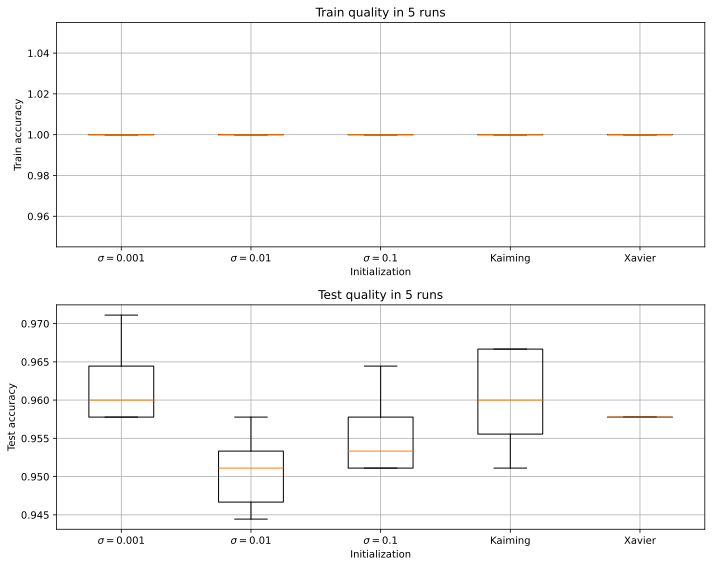

In [45]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False, tick_labels=init_vars_for_plot)
axes[1].boxplot(accs_test.T, showfliers=False, tick_labels=init_vars_for_plot)

axes[0].set_xlabel("Initialization")
axes[1].set_xlabel("Initialization")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

#### `4 слоя`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 4 слоями в сети.

In [46]:
init_vars = [5e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [47]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [48]:
### your code here
### your code here
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

for row, initialization in tqdm(enumerate(init_vars)):
    for launch in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, 4, ReLU)
        initialize_network(network, initialization)
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(
            compute_loss_grad, weights,       # fun and start point
            args=[network, X_train, y_train], # args passed to fun
            method="L-BFGS-B",                # optimization method
            jac=True,                         # says that gradient is computed in fun
            callback=cb.call
        )
        
        set_weights(res['x'], network)
        accs_train[row, launch] = np.mean(predict(network, X_train) == y_train)
        accs_test[row, launch] = np.mean(predict(network, X_test) == y_test)

5it [00:05,  1.12s/it]


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

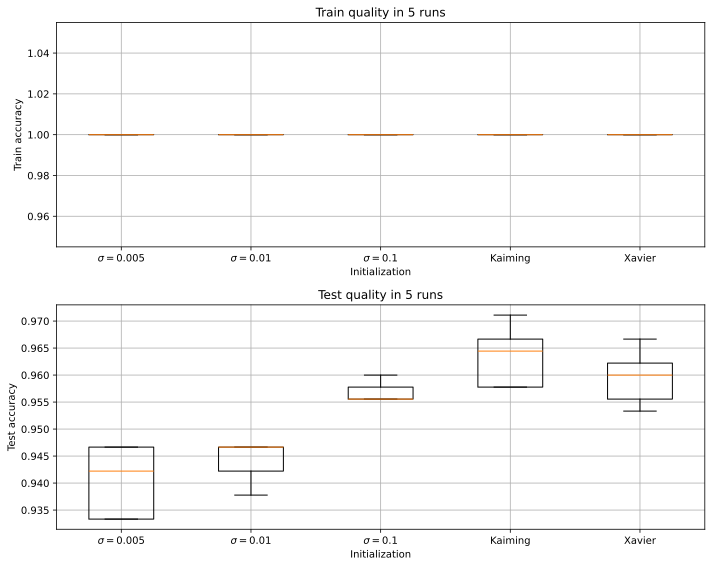

In [49]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False, tick_labels=init_vars_for_plot)
axes[1].boxplot(accs_test.T, showfliers=False, tick_labels=init_vars_for_plot)

axes[0].set_xlabel("Initialization")
axes[1].set_xlabel("Initialization")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

#### `5 слоев`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 5 слоями в сети.

In [50]:
init_vars = [1e-2, 1e-1, 1e0, 'Kaiming', 'Xavier']

In [51]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [52]:
### your code here
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

for row, initialization in tqdm(enumerate(init_vars)):
    for launch in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, 5, ReLU)
        initialize_network(network, initialization)
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(
            compute_loss_grad, weights,       # fun and start point
            args=[network, X_train, y_train], # args passed to fun
            method="L-BFGS-B",                # optimization method
            jac=True,                         # says that gradient is computed in fun
            callback=cb.call
        )
        
        set_weights(res['x'], network)
        accs_train[row, launch] = np.mean(predict(network, X_train) == y_train)
        accs_test[row, launch] = np.mean(predict(network, X_test) == y_test)

5it [00:14,  2.95s/it]


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

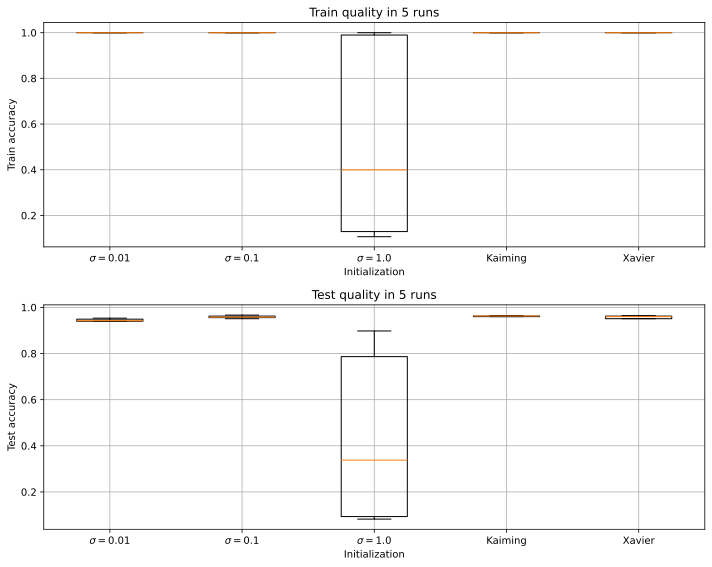

In [53]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False, tick_labels=init_vars_for_plot)
axes[1].boxplot(accs_test.T, showfliers=False, tick_labels=init_vars_for_plot)

axes[0].set_xlabel("Initialization")
axes[1].set_xlabel("Initialization")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

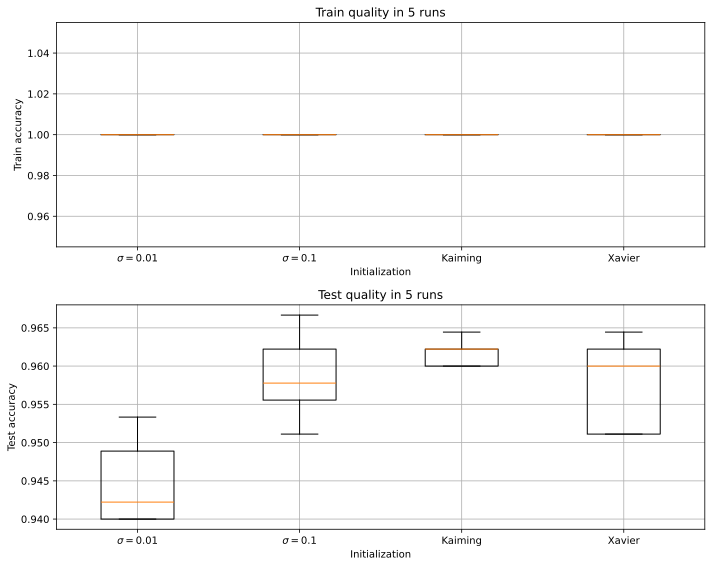

In [54]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]
init_vars_for_plot = init_vars_for_plot[:2] + init_vars_for_plot[3:]

new_accs_test = np.empty((4, 5))
new_accs_test[:2] = accs_test[:2]
new_accs_test[2:] = accs_test[3:]
new_accs_train = np.empty((4, 5))
new_accs_train[:2] = accs_train[:2]
new_accs_train[2:] = accs_train[3:]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(new_accs_train.T, showfliers=False, tick_labels=init_vars_for_plot)
axes[1].boxplot(new_accs_test.T, showfliers=False, tick_labels=init_vars_for_plot)

axes[0].set_xlabel("Initialization")
axes[1].set_xlabel("Initialization")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных инициализациях?
* Какие инициализации помогают обучать более глубокие сети?

__Ответы:__

Для почти всех инициализаций получается достичь точности 1 на обучающей выборке (кроме инициализации из нормального распределения с довольно большим среднеквадратичным отклонением)

Качество на тестовой выборке:
* Для сети из 3-х слоев: Преимущество от специальных видов инициализации не заметно
* Для сети из 4-х слоев: Лучше всего себя показывает инициализация Kaiming и Xavier
* Для сети из 5-и слоев: Лучше всего себя показывает инициализация Kaiming и Xavier

В среднем, наиболее устойчивый процесс обучения при использовании инициализации Kaiming

Как видно по графику, построенному выше - для обучения глубоких нейронных сетей подходят инициализации Kaiming и Xavier, что соотносится с теоретической основой

Теперь сравним скорость обучения при различных инициализациях. Создайте два списка списков `accs_test_on_iterations`, `accs_train_on_iterations` в каждом из которых в позиции `[i]` (см. описание `i` в предыдущем пункте) будет лежать список из значений `accuracy` на тестовой и обучающей выборках соотвественно, полученных во время обучения модели. Количество слоев в сети зафиксируйте равным 4.

In [55]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [56]:
accs_test_on_iterations = []
accs_train_on_iterations = []

In [57]:
### your code here
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

for row, initialization in tqdm(enumerate(init_vars)):
    network = make_network(input_size, hidden_layers_size, output_size, 4, ReLU)
    initialize_network(network, initialization)
    weights = get_weights(network)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
    res = minimize(
        compute_loss_grad, weights,       # fun and start point
        args=[network, X_train, y_train], # args passed to fun
        method="L-BFGS-B",                # optimization method
        jac=True,                         # says that gradient is computed in fun
        callback=cb.call,
    )
    accs_test_on_iterations.append(cb.test_acc)
    accs_train_on_iterations.append(cb.train_acc)

5it [00:01,  4.67it/s]


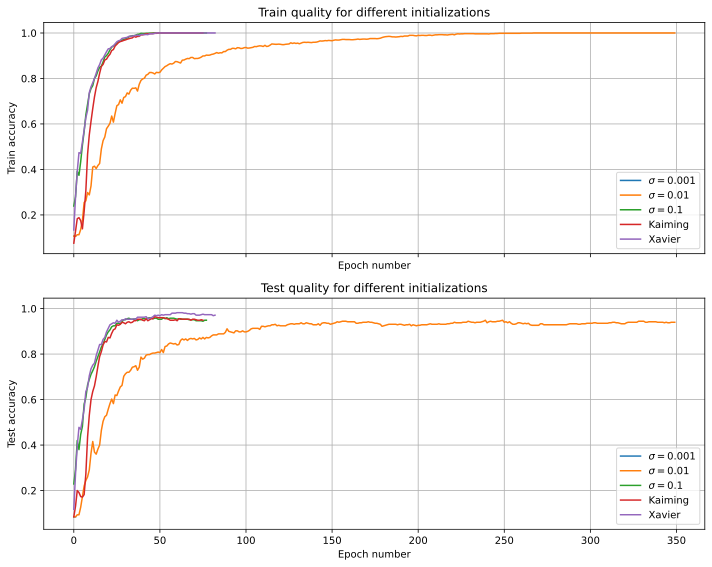

In [58]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True,  figsize=(10, 8))

for idx, label in enumerate(init_vars_for_plot):
    ax[0].plot(accs_train_on_iterations[idx], label=label)
    ax[1].plot(accs_test_on_iterations[idx], label=label)

for idx, key in enumerate(["Train", "Test"]):
    ax[idx].set_title(f"{key} quality for different initializations")
    ax[idx].set_xlabel("Epoch number")
    ax[idx].set_ylabel(f"{key} accuracy")
    ax[idx].grid(True)
    ax[idx].legend()



fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как меняется скорость обучения в зависимости от выбранной инициализации?

__Ответы:__

1. Наилучшую скорость обучения обеспечивает использование инициализации Kaiming (так как она теоретически обоснована)
2. С уменьшением дисперсии распределения, из которого генерируются веса происходит замедление обучения, а при $\sigma = 0.001$ модель вообще не обучается (критерий останова срабатывает после пары итераций)

Таким образом выбор инициализации весов может быть критически важен для обучения нейронной сети

### `Эксперименты c различными функциями активации (0.6 балла)`

Проверим теперь, с какой функцией активации нейронная сеть будет обучаться лучше.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными функциями активации.

Для этого нам нужно реализовать еще 2 слоя: для функций активации `Tanh` и `Sigmoid`.

In [59]:
class Tanh:
    """
    tanh(y) = (e^y - e^(-y)) / (e^y + e^(-y))
    Используйте функцию np.tanh для подсчета гиперболического тангенса.
    Вы можете сами реализовать подсчет tanh, но тогда вам нужно устойчиво его вычислять.
    """
    def __init__(self):
        self.params = [] # Tanh has no parameters

    def forward(self, input):
        """
        Apply elementwise Tanh to [batch, num_units] matrix
        """
        ### your code here
        self.res = np.tanh(input)
        return self.res

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Tanh input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        ### your code here
        return grad_output * (1 - self.res ** 2), []

    def __repr__(self):
        return 'Tanh()'

In [60]:
from scipy.special import expit
    
class Sigmoid:
    """
    sigmoid(y) = 1 / (1 + e^(-y))
    Используйте функцию expit для подсчета сигмоиды.
    Вы можете сами реализовать подсчет сигмоиды, но тогда вам нужно устойчиво ее вычислять.
    """
    def __init__(self):
        self.params = [] # Sigmoid has no parameters

    def forward(self, input):
        """
        Apply elementwise Sigmoid to [batch, num_units] matrix
        """
        ### your code here
        self.res = expit(input)
        return self.res

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Sigmoid input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        ### your code here
        return grad_output * self.res * (1 - self.res), []

    def __repr__(self):
        return 'Sigmoid()'

Теперь попробуйте для каждой из 3 функций активации обучить нейронную сеть несколько раз. Число слоев зафиксируйте равным 3. В случае `Tanh` и `Sigmoid` используйте инициализацию `Xavier`, а в случае `ReLU` используйте инициализацию `Kaiming`.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с функцией активации $ReLU$ при $i = 0$, с функцией активации $Tanh$ при $i = 1$ и с функцией активации $Sigmoid$ при $i = 2$.

In [61]:
act_func_vars = ['ReLU', 'Tanh', 'Sigmoid']
init_for_act_funcs = ['Kaiming', 'Xavier', 'Xavier']
act_func = [ReLU, Tanh, Sigmoid]

In [62]:
accs_train = np.zeros((3, 5))
accs_test = np.zeros((3, 5))

In [63]:
### your code here
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

train_hist = []

for row, act, initialization in tqdm(zip(range(3), act_func, init_for_act_funcs)):
    for launch in range(5):
        tmp_hist = 0 
        
        network = make_network(input_size, hidden_layers_size, output_size, 3, act)
        initialize_network(network, initialization)
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(
            compute_loss_grad, weights,       # fun and start point
            args=[network, X_train, y_train], # args passed to fun
            method="L-BFGS-B",                # optimization method
            jac=True,                         # says that gradient is computed in fun
            callback=cb.call
        )

        set_weights(res['x'], network)
        tmp_hist += np.array(cb.train_acc)
        accs_train[row, launch] = np.mean(predict(network, X_train) == y_train)
        accs_test[row, launch] = np.mean(predict(network, X_test) == y_test)
    train_hist.append(tmp_hist / 5)

3it [00:03,  1.23s/it]


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

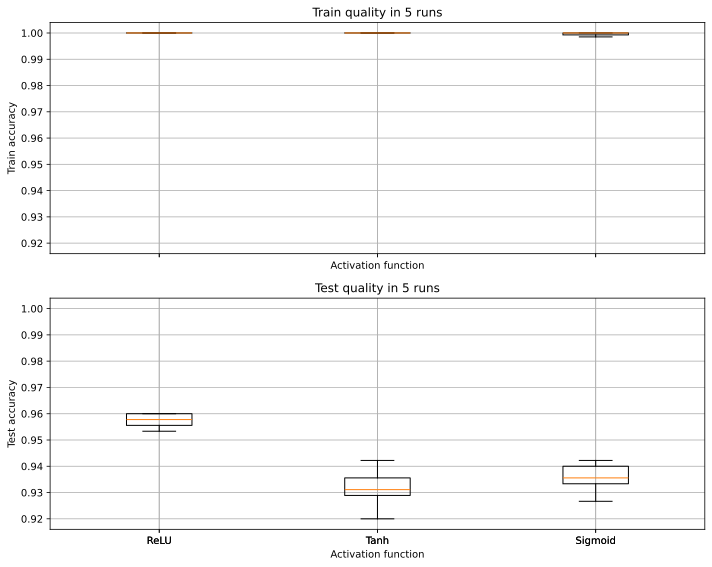

In [64]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True,  figsize=(10, 8))

ax[0].boxplot(accs_train.T, tick_labels=act_func_vars, showfliers=False)
ax[1].boxplot(accs_test.T, tick_labels=act_func_vars, showfliers=False)

ax[0].set_title("Train quality in 5 runs")
ax[1].set_title("Test quality in 5 runs")

ax[0].set_xlabel("Activation function")
ax[1].set_xlabel("Activation function")

ax[0].set_ylabel("Train accuracy")
ax[1].set_ylabel("Test accuracy")

ax[0].grid(True)
ax[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных функциях активации?

__Ответы:__

1. Как мы видим, при использовании функции активации ReLU получается достичь лучшего качества (и на обучающей, и на валидационной выборке)
2. По графику, построенному ниже, можно сделать вывод, что использование функция активации ReLU приводит к более стабильному обучению модели. Несмотря на то что при использовании Сигмоиды и гиперболического тангенса на первых итерациях обучение идет быстрее, в конечном итоге значительно быстрее обучается модель, построенная с функцией активации ReLU (что подтверждает утверждение о стабильности). Также можно заметить, что модель с ReLU имеет наименьший разброс итогового значения точности для различных (случайных) инициализаций весов - опять же аргумент  в пользу стабильности.

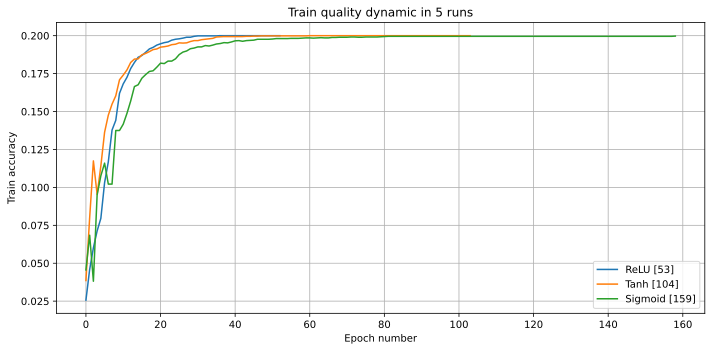

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for hist, label in zip(train_hist, act_func_vars):
    ax.plot(hist, label=f'{label} [{len(hist)}]')

ax.set_title("Train quality dynamic in 5 runs")
ax.set_xlabel("Epoch number")
ax.set_ylabel("Train accuracy")
ax.legend()
ax.grid(True)

fig.tight_layout()
plt.show()

\* Несколько фрагментов кода в задании написаны на основе материалов [курса по глубинному обучению на ФКН НИУ ВШЭ](https://www.hse.ru/ba/ami/courses/205504078.html)

### `Реализация метода оптимизации (1.4 балла)`

В этой части задания реализуйте метод оптимизации SGD + momentum. Упрощённая версия более общего алгоритма [отсюда](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html):

$$
\begin{aligned}
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: X \text{ (data)},       \\
    &\hspace{13mm} \: f(\theta) \text{ (objective)}, \:\mu \text{ (momentum)}       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{5mm}\mathcal{X} \leftarrow \texttt{list\_of\_random\_batches}(X)\\
    &\hspace{5mm}\textbf{for} \: i=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{10mm}g_t\leftarrow   \nabla_{\theta} f_t (\theta_{t-1},\mathcal{X}_i)      \\
    &\hspace{10mm}\textbf{if} \: \mu \neq 0                                          \\
    &\hspace{15mm}\textbf{if} \: t > 1                                              \\
    &\hspace{20mm} \textbf{b}_t \leftarrow \mu \textbf{b}_{t-1} + g_t               \\
    &\hspace{15mm}\textbf{else}                                                     \\
    &\hspace{20mm} \textbf{b}_t \leftarrow g_t                                      \\
    &\hspace{15mm} g_t  \leftarrow  \textbf{b}_t                                     \\
    &\hspace{10mm}\theta_t \leftarrow \theta_{t-1} - \gamma g_t                      \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
    &\bf{return} \:  \theta_t                                                       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
\end{aligned}
$$

Проще всего будет написать `custom minimizer` (смотри [документацию scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)).

In [66]:
from scipy.optimize import OptimizeResult


def SGD(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    mu = kwargs['momentum']
    n_iter = kwargs['n_iter']
    gamma = kwargs['lr']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']
    if not jac:
        raise('Requires gradient in fun')
    
    net, X, y = args
    
    # your code is here
    weights = x0
    b = np.zeros_like(x0)

    result = OptimizeResult(x=weights, fun=None, nit=0)
    
    idx = np.arange(X.shape[0])
    callback(weights)
    
    for epoch in range(n_iter):
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        epoch_loss = 0
        for start in range(0, X.shape[0], batch_size):
            X_batch = X[start:start + batch_size]
            y_batch = y[start:start + batch_size]
            loss, grad = fun(weights, args=[net, X_batch, y_batch])
            epoch_loss += loss * min(batch_size, X.shape[0] - start)

            g = grad
            if mu:
                b = mu * b + g
                g = b
            weights = weights - gamma * g
        callback(weights)

        epoch_loss /= X.shape[0] 
        if result.fun is None or epoch_loss < result.fun:
            result.fun = epoch_loss
            result.x = weights
        result.nit += 1
    return result

**Задание 1. (0.5 балла)** Продемонстрируйте правильную работу метода оптимизации, получив `test_accuracy>=0.9`.

In [67]:
# your code is here
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
initialize_network(network, 'Kaiming')
weights = get_weights(network)
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
res = SGD(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    jac=True,                         # says that gradient is computed in fun
    callback=cb.call,
    momentum=0.9,
    n_iter=100,
    lr=0.01,
    batch_size=32
)

set_weights(res['x'], network)
print(f'Accuracy (Train / Test): {np.mean(predict(network, X_train) == y_train)} / {np.mean(predict(network, X_test) == y_test)}')

Accuracy (Train / Test): 1.0 / 0.9644444444444444


In [68]:
res

 fun: 0.00013087572464234051
   x: [-2.689e-01 -7.052e-02 ...  6.411e-01  1.772e-02]
 nit: 100

**Задание 2. (0.8 балла)** Сравните три алгоритма:
1. LBFGS-B
2. SGD
3. SGD + momentum

Для этого одновременно переберите следующие гиперпараметры:
- значения `lr` на отрезке `[1e-3, 1e-1]` по логарифмической сетке
- два значения `momentum`: `0` и `0.9`
- значения `batch_size`: `8` и `32`

В каждом запуске сохраняйте три метрики: итоговое accuracy на тесте и на трейне и время обучения.

Для каждого из трёх алгоритмов выберите лучшие `lr` и `batch_size` по `test_accuracy`. Постройте для них кривые обучения (пример ниже). Сделайте выводы.

![](comparison.svg)

In [69]:
# your code is here
from itertools import product

lr_grid = 10.0 ** np.arange(-3, 0)
momentum_grid = [0, 0.9]
batch_size_grid = [8, 32]

train_hist = []
test_hist = []

for batch_size, lr, momentum in product(batch_size_grid, lr_grid, momentum_grid):
    network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
    initialize_network(network, 'Kaiming')
    weights = get_weights(network)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
    res = SGD(
        compute_loss_grad, weights,       # fun and start point
        args=[network, X_train, y_train], # args passed to fun
        jac=True,                         # says that gradient is computed in fun
        callback=cb.call,
        momentum=momentum,
        n_iter=25,
        lr=lr,
        batch_size=batch_size
    )

    set_weights(res['x'], network)
    train_hist.append((batch_size, lr, momentum, np.mean(predict(network, X_train) == y_train)))
    test_hist.append((batch_size, lr, momentum, np.mean(predict(network, X_test) == y_test)))

In [70]:
train_hist = np.array(train_hist)
test_hist = np.array(test_hist)

best_sgd_params = test_hist[np.argmax(np.where(test_hist[:, 2] == 0, test_hist[:, 3], 0))]
best_sgdm_params = test_hist[np.argmax(np.where(test_hist[:, 2] == 0.9, test_hist[:, 3], 0))]

best_sgd_params, best_sgdm_params

(array([8.  , 0.01, 0.  , 0.96]),
 array([8.00000000e+00, 1.00000000e-03, 9.00000000e-01, 9.71111111e-01]))

In [71]:
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
initialize_network(network, 'Kaiming')
weights = get_weights(network)
cb_sgd = Callback(network, X_train, y_train, X_test, y_test, print=False)
res = SGD(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    jac=True,                         # says that gradient is computed in fun
    callback=cb_sgd.call,
    momentum=0,
    n_iter=25,
    lr=best_sgd_params[1],
    batch_size=int(best_sgd_params[0])
)

In [72]:
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
initialize_network(network, 'Kaiming')
weights = get_weights(network)
cb_sgdm = Callback(network, X_train, y_train, X_test, y_test, print=False)
res = SGD(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    jac=True,                         # says that gradient is computed in fun
    callback=cb_sgdm.call,
    momentum=0.9,
    n_iter=25,
    lr=best_sgdm_params[1],
    batch_size=int(best_sgdm_params[0])
)

In [73]:
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
initialize_network(network, 'Kaiming')
weights = get_weights(network)
cb_min = Callback(network, X_train, y_train, X_test, y_test, print=False)
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    jac=True,                         # says that gradient is computed in fun
    callback=cb_min.call,
    method='L-BFGS-B'
)

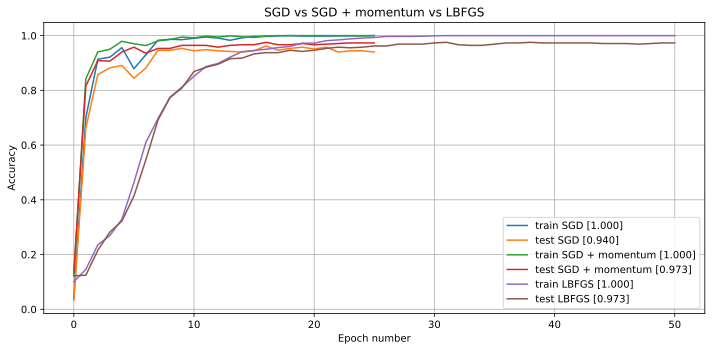

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

cbs = [cb_sgd, cb_sgdm, cb_min]
init_vars_for_plot = ['SGD', 'SGD + momentum', 'LBFGS']

for idx, (label, cb) in enumerate(zip(init_vars_for_plot, cbs)):
    ax.plot(cb.train_acc, label=f'train {label} [{cb.train_acc[-1]:.3f}]')
    ax.plot(cb.test_acc, label=f'test {label} [{cb.test_acc[-1]:.3f}]')

ax.set_title("SGD vs SGD + momentum vs LBFGS")
ax.set_xlabel("Epoch number")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

**Выводы:**

1. Лучшего результата получается достичь, используя SGD + momentum
2. SGD сходится значительно быстрее LBFGS при обучении нейронной сети
3. Значительных отличий в скорости сходимости SGD без и с моментом не наблюдается, что можно обосновать тем, что задача довольно проста и не имеет "овражную" структуру (а именно в этом случае максимально полезно использование значений градиентов с предыдущих итераций). Тем не менее обучение с momentum более стабильное, чем без него.

**Задание 3. (0.1 балла)** Для отобранных в прошлом задании трёх алгоритмов ответье на вопрос: как меняются запуски для двух значений `batch_size`.

In [75]:
cb_list = []

for momentum, batch_size in product(momentum_grid, batch_size_grid):
    best_lr = test_hist[np.argmax(
        np.where(
            (test_hist[:, 0] == batch_size) & (test_hist[:, 2] == momentum),
            test_hist[:, 3],
            0
        )
    )][1]
    network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
    initialize_network(network, 'Kaiming')
    weights = get_weights(network)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
    res = SGD(
        compute_loss_grad, weights,       # fun and start point
        args=[network, X_train, y_train], # args passed to fun
        jac=True,                         # says that gradient is computed in fun
        callback=cb.call,
        momentum=momentum,
        n_iter=50,
        lr=best_lr,
        batch_size=batch_size
    )
    cb_list.append(cb)

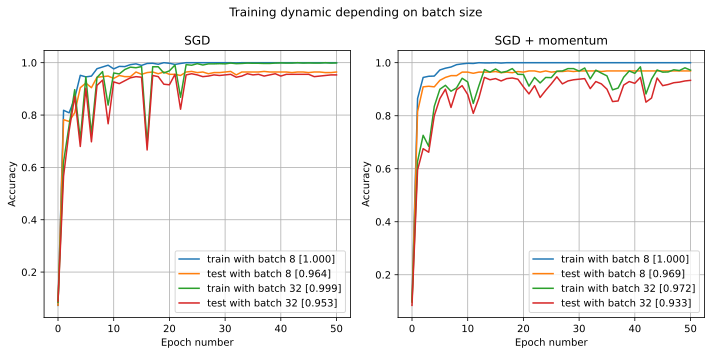

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

cbs = [cb_sgd, cb_sgdm, cb_min]
init_vars_for_plot = ['SGD', 'SGD + momentum']

for i, (momentum, title) in enumerate(zip(momentum_grid, init_vars_for_plot)):
    ax[i].set_title(title)
    ax[i].set_xlabel("Epoch number")
    ax[i].set_ylabel("Accuracy")
    ax[i].grid(True)
    for j, batch_size in enumerate(batch_size_grid):
        idx = i * len(momentum_grid) + j
        ax[i].plot(
            cb_list[idx].train_acc,
            label=f'train with batch {batch_size} [{cb_list[idx].train_acc[-1]:.3f}]'
        )
        ax[i].plot(
            cb_list[idx].test_acc,
            label=f'test with batch {batch_size} [{cb_list[idx].test_acc[-1]:.3f}]'
        )
    ax[i].legend()

fig.suptitle("Training dynamic depending on batch size")
fig.tight_layout()
plt.show()

**Ответ:**

Выбор меньшего размера батча позволяет ускорить обучение для обоих методов

## `Бонусная часть`

### `Реализация метода оптимизации (1 балл)`

Реализуйте метод оптимизации Adam и сравните его работу с SGD + momentum, проведя эксперимент, как в задании 2 (перебор гиперпараметров + кривые обучения).

In [77]:
 from scipy.optimize import OptimizeResult


def Adam(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    n_iter = kwargs['n_iter']
    b1 = kwargs['beta1']
    b2 = kwargs['beta2']
    alpha = kwargs['alpha']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']
    
    net, X, y = args
    
    weights = x0
    m = 0
    v = 0
    b = np.zeros_like(x0)

    result = OptimizeResult(x=weights, fun=None, jac=None, nit=0)
    
    idx = np.arange(X.shape[0])
    callback(weights)
    b1_mul = 1
    b2_mul = 1

    epoch_loss = 0
    for epoch in range(n_iter):
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        for start in range(0, X.shape[0], batch_size):
            X_batch = X[start:start + batch_size]
            y_batch = y[start:start + batch_size]
            loss, grad = fun(weights, args=[net, X_batch, y_batch])
            epoch_loss += loss * min(X.shape[0], batch_size)
            
            b1_mul *= b1
            b2_mul *= b2
            
            g = grad
            m = b1 * m + (1 - b1) * g
            v = b2 * v + (1 - b2) * g ** 2

            m_new = m / (1 - b1_mul)
            v_new = v / (1 - b2_mul)
            weights = weights - alpha * m_new / (v_new + 1e-6)
        callback(weights)

        epoch_loss /= X.shape[0]
        if result.fun is None or epoch_loss < result.fun:
            result.fun = epoch_loss
            result.x = weights
            if jac:
                result.jac = grad
        result.nit += 1
    return result

In [78]:
def get_best_params(optimizer, optimizer_params, layers, print_res=True):
    best_params = None
    best_score = 0
    best_weights = None
    best_curves = None

    for param_set in product(*optimizer_params.values()):
        kwargs = {key: val for key, val in zip(optimizer_params.keys(), param_set)}
        
        network = make_network(input_size, hidden_layers_size, output_size, layers, ReLU)
        initialize_network(network, 'Kaiming')
        weights = get_weights(network)
        
        cb = Callback(network, X_train, y_train, X_test, y_test)
        res = optimizer(
            compute_loss_grad, weights,
            args=[network, X_train, y_train],
            jac=True,
            callback=cb.call,
            **kwargs
        )
        
        if cb.test_acc[-1] > best_score:
            best_params = kwargs
            best_score = cb.test_acc[-1]
            best_weights = res.x
            best_curves = cb
    if print_res:
        print(best_params)
    return best_score, best_params, best_weights, best_curves

In [79]:
sgd_params = {
    'momentum': [0, 0.9],
    'lr': [1e-3, 1e-2, 1e-3],
    'n_iter': [50],
    'batch_size': [8, 32],
}

adam_params = {
    'beta1': [0.8, 0.9, 0.95],
    'beta2': [0.9, 0.99, 0.999],
    'alpha': [1e-3, 3e-4],
    'batch_size': [8, 32],
    'n_iter': [50],
}

In [80]:
cb_list = []

_, _, _, cb = get_best_params(SGD, sgd_params, 3)
cb_list.append(cb)

_, _, _, cb = get_best_params(Adam, adam_params, 3)
cb_list.append(cb)

{'momentum': 0, 'lr': 0.01, 'n_iter': 50, 'batch_size': 8}
{'beta1': 0.8, 'beta2': 0.99, 'alpha': 0.0003, 'batch_size': 32, 'n_iter': 50}


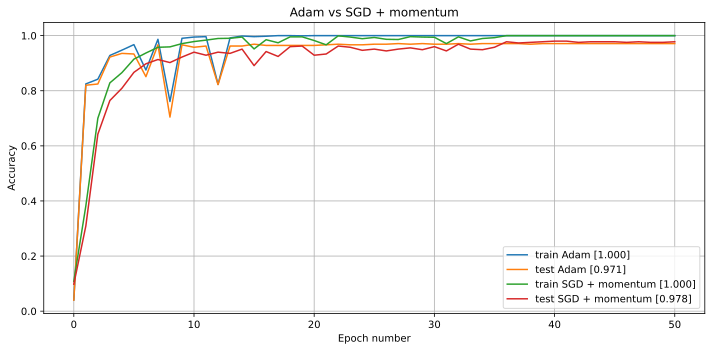

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

init_vars_for_plot = ['Adam', 'SGD + momentum']

for idx, (label, cb) in enumerate(zip(init_vars_for_plot, cb_list)):
    ax.plot(cb.train_acc, label=f'train {label} [{cb.train_acc[-1]:.3f}]')
    ax.plot(cb.test_acc, label=f'test {label} [{cb.test_acc[-1]:.3f}]')

ax.set_title("Adam vs SGD + momentum")
ax.set_xlabel("Epoch number")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

**Ответ**:

Использование Adam делает более стабильным обучение и повышает качество модели

### `Dropout (1 балл)`

Реализуйте слой Dropout. Сравните обучение сети из большого числа слоёв при использовании Dropout и без его использования (предварительно подберите адекватный параметр $p$). Сделайте выводы.

In [82]:
class Dropout:
    """
    """
    def __init__(self, prob=0.2):
        self.p = prob
        self.train = False
        self.params = []

    def forward(self, input):
        """
        """
        if self.train:
            p =  1 - self.p
        else:
            p = 1
        self.mask = np.random.binomial(1, p, size=(1, input.shape[1])) / p
        return input * self.mask

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Dropout input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        ### your code here
        if not self.train:
            raise Exception('Grads only allowed in train mode')
        return grad_output * self.mask, []

    def __repr__(self):
        return f'Dropout({self.p})'

In [83]:
def make_network_v2(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU, dropout_rate=None):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())

        if dropout_rate is not None and layer_idx == 0:
            network.append(Dropout(dropout_rate))

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [84]:
def set_mode(network, train=False):
    for layer in network:
        if isinstance(layer, Dropout):
            layer.train = train

Рассмотрим поведение модели при различных значениях P - вероятности игнорирования выхода нейрона в Dropout слое

In [85]:
class Callback_v2:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []
        
    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        set_mode(network, train=False)
        set_weights(weights, network)
        self.train_acc.append(
            np.mean(predict(network, X_train) == y_train)
        )
        self.test_acc.append(
            np.mean(predict(network, X_test) == y_test)
        )
        if self.print:
            print(self.train_acc[-1], self.test_acc[-1])
        set_mode(network, train=True)

In [86]:
p_grid = [0, 0.1, 0.2, 0.5, 0.9]
cb_list = [] 

for p in p_grid:
    network = make_network_v2(input_size, hidden_layers_size, output_size, 10, ReLU, dropout_rate=p)
    set_mode(network, train=True)
    initialize_network(network, 'Kaiming')
    weights = get_weights(network)
    cb = Callback_v2(network, X_train, y_train, X_test, y_test, print=False)
    res =SGD(
        compute_loss_grad, weights,       # fun and start point
        args=[network, X_train, y_train], # args passed to fun
        jac=True,                         # says that gradient is computed in fun
        callback=cb.call,
        lr=0.001,
        momentum=0.9,
        n_iter=100,
        batch_size=8
    )
    cb_list.append(cb)

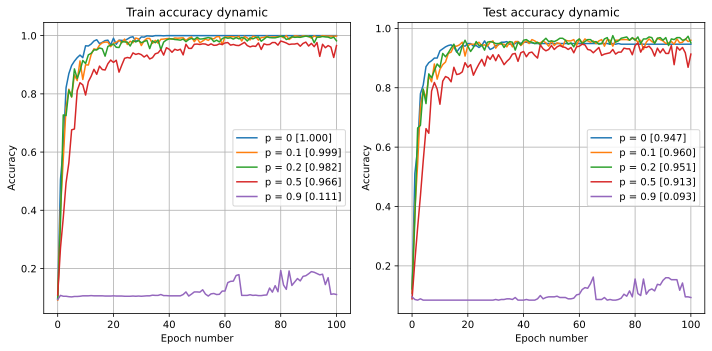

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title('Train accuracy dynamic')
ax[1].set_title('Test accuracy dynamic')

for p, cb in zip(p_grid, cb_list):
    ax[0].plot(cb.train_acc, label=f'p = {p} [{cb.train_acc[-1]:.3f}]')
    ax[1].plot(cb.test_acc, label=f'p = {p} [{cb.test_acc[-1]:.3f}]')

for i in range(len(ax)):
    ax[i].set_xlabel("Epoch number")
    ax[i].set_ylabel("Accuracy")
    ax[i].grid(True)
    ax[i].legend()

fig.tight_layout()
plt.show()

**Ответ**:

Как видно при обучении сети из 10 слоев (к сожалению размеры датасета не позволяют обучить что-то большее) дропаут улучшает качество. Адекватное значение вероятности "выключения" нейрона для нашей модели находится в диапазоне [0.1, 0.5].

Основные выводы по графику:

1. Применение dropout может ускорить обучение
2. При выборе слишком больших значений $p$ сеть перестает обучаться (график становится очень нестабильным)

### `BatchNormalization (1 балл)`

Реализуйте слой `BatchNormalization`. Сравните обучение сети из большого числа слоёв при использовании `BatchNormalization` и без его использования. Сделайте выводы.